In [1]:
%pip install pandas
%pip install pandas
%pip install matplotlib
%pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
%pip install pmdarima
        

In [6]:
from pmdarima import auto_arima

In [7]:
df = pd.read_csv("/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv")

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [9]:

df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [16]:
df = df.set_index('date')

In [17]:
df.index.freq= 'MS'

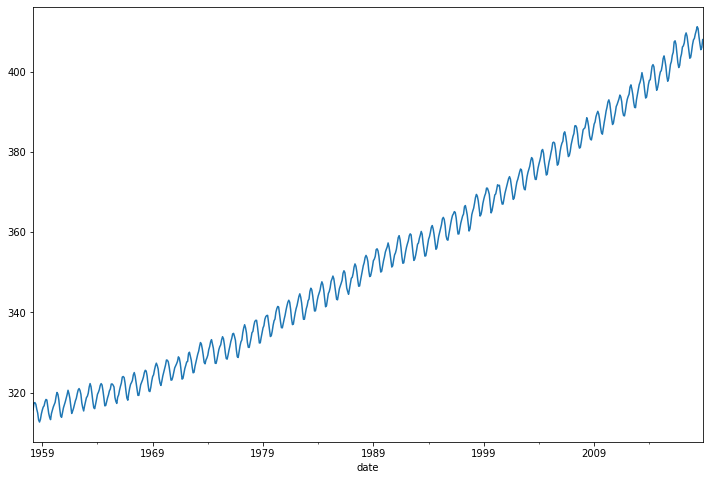

In [18]:
df['interpolated'].plot(figsize=(12,8))

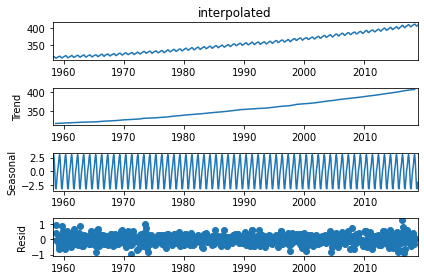

In [20]:
result = seasonal_decompose(df['interpolated'],model = 'add')
result.plot();

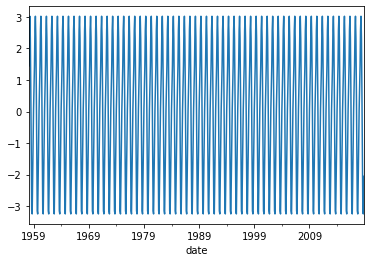

In [21]:
result.seasonal.plot()

In [22]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.273
Date:                            Fri, 18 Feb 2022   AIC                            424.545
Time:                                    04:25:22   BIC                            452.087
Sample:                                         0   HQIC                           435.172
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3462      0.066      5.213      0.000       0.216       0.476
ar.L2          0.0876      0.019      4.632      0.000       0.051       0.125
ma.L1         -0.7004      0.056    -12.464      0.000      -0.811      -0.590
ar.S.L12       0.9996      0.000   2875.709      0.000       0.999       1.000
ma.S.L12      -0.8644      0.022    -39.965      0.000      -0.907      -0.822
sigma2         0.0961      0.005     20.554      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.76   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
len(df)

729

In [24]:
train = df.iloc[:717]

In [25]:
test = df.iloc[717:]

In [35]:
model = SARIMAX(train['interpolated'],order=(2, 1, 1),seasonal_order=(1, 0, 1, 12))

In [36]:
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.892
Date:                            Fri, 18 Feb 2022   AIC                            415.784
Time:                                    04:33:39   BIC                            443.226
Sample:                                03-01-1958   HQIC                           426.381
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3501      0.074      4.701      0.000       0.204       0.496
ar.L2          0.0845      0.019      4.440      0.000       0.047       0.122
ma.L1         -0.7041      0.060    -11.718      0.000      -0.822      -0.586
ar.S.L12       0.9996      0.000   2733.220      0.000       0.999       1.000
ma.S.L12      -0.8645      0.023    -37.658      0.000      -0.909      -0.820
sigma2         0.0954      0.005     20.322      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start = len(train)
end = len(train)+len(test)-1

In [43]:
predictions = results.predict(start,end,typ='level').rename('Sarima Pred')

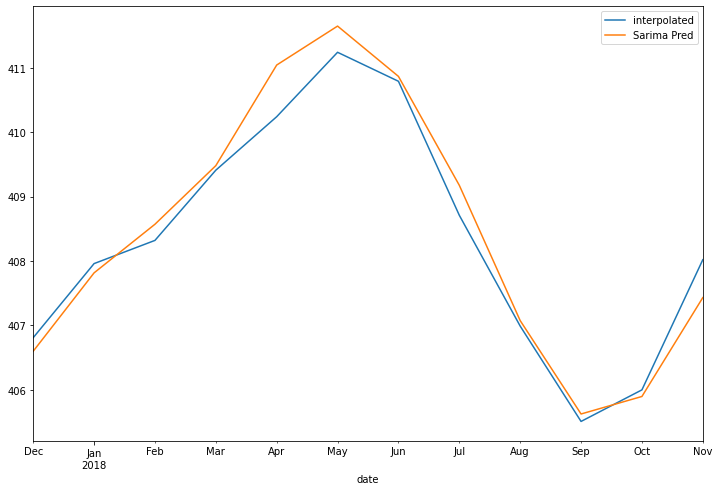

In [44]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True,figsize=(12,8))

In [45]:
from statsmodels.tools.eval_measures import rmse

In [46]:
error = rmse(test['interpolated'],predictions)

In [47]:
error

0.3583001734636146

In [49]:
test['interpolated'].mean()

408.3333333333333

## True Forecast into unknown future

In [50]:
model = SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1, 0, 1, 12))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [52]:
fcast = results.predict(len(df),len(df)+11,typ='level').rename('SARIMA FORECASt')

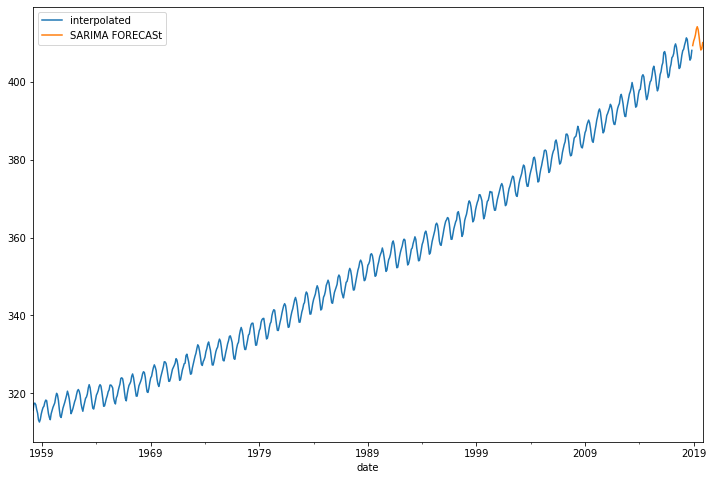

In [53]:
df['interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [58]:
fecast = results.predict(len(df),len(df)+11,typ='linear').rename('SARIMA FORECAST')
print(fecast)

2018-12-01    409.259772
2019-01-01    410.420511
2019-02-01    411.081987
2019-03-01    411.998093
2019-04-01    413.450909
2019-05-01    414.103990
2019-06-01    413.365684
2019-07-01    411.621401
2019-08-01    409.572752
2019-09-01    408.119117
2019-10-01    408.420216
2019-11-01    410.020014
Freq: MS, Name: SARIMA FORECAST, dtype: float64


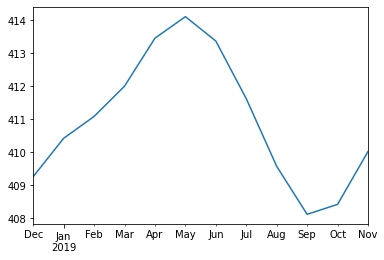

In [61]:
fecast.plot()

In [59]:
print(fcast)


2018-12-01    409.259772
2019-01-01    410.420511
2019-02-01    411.081987
2019-03-01    411.998093
2019-04-01    413.450909
2019-05-01    414.103990
2019-06-01    413.365684
2019-07-01    411.621401
2019-08-01    409.572752
2019-09-01    408.119117
2019-10-01    408.420216
2019-11-01    410.020014
Freq: MS, Name: SARIMA FORECASt, dtype: float64


In [56]:
predictions = results.predict(start,end,typ='linear').rename('Sarima Pred')

In [57]:
print(predictions)

date
2017-12-01    406.598632
2018-01-01    407.951182
2018-02-01    408.703835
2018-03-01    409.356220
2018-04-01    410.962112
2018-05-01    411.112890
2018-06-01    410.442885
2018-07-01    409.004998
2018-08-01    406.710757
2018-09-01    405.442209
2018-10-01    405.757250
2018-11-01    407.437729
Freq: MS, Name: Sarima Pred, dtype: float64
